A collection of thoughts on interpolation as it applies to OpenSCM.

In [1]:
import numpy as np

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
COLOUR_1 = "lime"
COLOUR_2 = "midnightblue"
COLOUR_3 = "firebrick"
COLOUR_4 = "deeppink"

MARKER_1 = "o"
MARKER_2 = "^"
MARKER_3 = "+"
MARKER_4 = "x"

OpenSCM's desire to offer interpolation functions makes it a fairly ambitious package as such operations are always tricky and require careful thought. The first assumption we make in this notebook is that the interpolation is always between points which are supplied on a grid, i.e. are discrete, interpolation is obviously not required if you start with continuous functions.

The problem with discrete data is that you need to make an assumption about what happens in between. Depending on the context, the most sensible assumptions can change.

## Source data

In this notebook, we will always start with the following data. We will explore how the interpolated values change depending on what that data represents and the assumptions we make.

In [31]:
source_values = np.array([0, 3, 5, 3, 6, 1, -2, 1])
source_times = np.array([0, 2, 4, 8, 10, 11, 13, 15])

### Plot

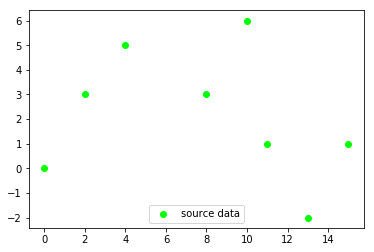

In [34]:
ax = plt.figure().add_subplot(111)
ax.scatter(
    source_times, source_values, 
    color=COLOUR_1, marker=MARKER_1,
    label="source data"
)
ax.legend(loc="lower center");

It is important to remember that at this point all we have is a series of discrete points. There is no information on how we should 'join the dots'. 

*Warning* In general, if you interpolate both the source and target data, you will get different looking curves. This is because there is, in general, an information loss associated with interpolation.

## Target times

As a base, we will always interpolate onto the same target times in this notebook. We will add other examples as appropriate, but this will provide continuity throughout all of the different applications.

In [38]:
target_times = np.array([0, 3, 4, 6, 9, 12])

### Plot

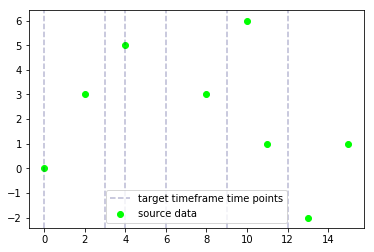

In [39]:
ax = plt.figure().add_subplot(111)
ax.scatter(
    source_times, source_values, 
    color=COLOUR_1, marker=MARKER_1,
    label="source data"
)
for i, x in enumerate(target_times):
    ax.axvline(
        x=x, 
        color=COLOUR_2, 
        alpha=0.3, 
        linestyle="--", 
        label="target timeframe time points" if i == 0 else None
    )
ax.legend(loc="lower center");

## Example 1: Point concentration data

If the data is concentrations data at the given point in time only, then a sensible interpolation could be linear interpolation. This is fairly trivial, the first step is to assume that the discrete data can be converted into a continuous function simply by joining the points with a straight line.

### Plot

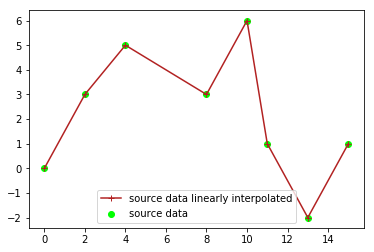

In [41]:
ax = plt.figure().add_subplot(111)
ax.scatter(
    source_times, source_values, 
    color=COLOUR_1, marker=MARKER_1,
    label="source data"
)
ax.plot(
    source_times, source_values, 
    color=COLOUR_3, marker=MARKER_3,
    label="source data linearly interpolated"
)
ax.legend(loc="lower center");

The second step is to calculate the concentrations at our target times from our interpolated line.

In [42]:
target_values = np.interp(target_times, source_times, source_values)

### Plot

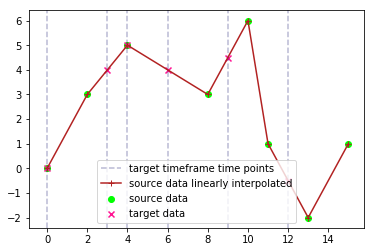

In [44]:
ax = plt.figure().add_subplot(111)
ax.scatter(
    source_times, source_values, 
    color=COLOUR_1, marker=MARKER_1,
    label="source data"
)
for i, x in enumerate(target_times):
    ax.axvline(
        x=x, 
        color=COLOUR_2, 
        alpha=0.3, 
        linestyle="--", 
        label="target timeframe time points" if i == 0 else None
    )
ax.plot(
    source_times, source_values, 
    color=COLOUR_3, marker=MARKER_3,
    label="source data linearly interpolated"
)
ax.scatter(
    target_times, target_values, 
    color=COLOUR_4, marker=MARKER_4,
    label="target data"
)
ax.legend(loc="lower center");

Plotting our discrete source and target data, the net result is the following. 

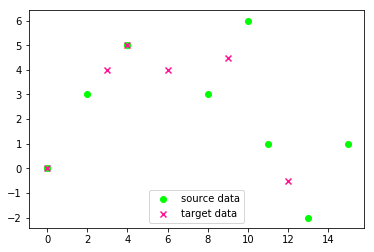

In [45]:
ax = plt.figure().add_subplot(111)
ax.scatter(
    source_times, source_values, 
    color=COLOUR_1, marker=MARKER_1,
    label="source data"
)
ax.scatter(
    target_times, target_values, 
    color=COLOUR_4, marker=MARKER_4,
    label="target data"
)
ax.legend(loc="lower center");

If we interpolate our source and target data, the results are clearly different. This is because of the information loss associated with linearly interpolating onto target times which are not a subset of the source times.

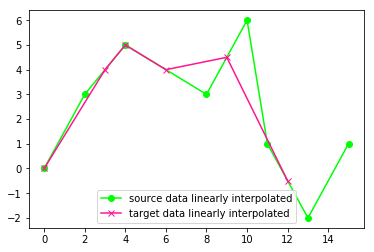

In [46]:
ax = plt.figure().add_subplot(111)
ax.plot(
    source_times, source_values, 
    color=COLOUR_1, marker=MARKER_1,
    label="source data linearly interpolated"
)
ax.plot(
    target_times, target_values, 
    color=COLOUR_4, marker=MARKER_4,
    label="target data linearly interpolated"
)
ax.legend(loc="lower center");

## Example 2: Point temperature data

For temperature data, a linear interpolation may be deemed inappropriate because it creates kinks in the timeseries which are unphysical for a variable like temperature. Instead, we may argue that the first and second derivatives of our interpolated timeseries should be continuous and hence we should use a cubic interpolation (more information [here](http://www.nbi.dk/~koskinen/Teaching/AdvancedMethodsInAppliedStatistics2018/Lecture4.5_Splines.pdf)).

In [ ]:
ax = plt.figure().add_subplot(111)
ax.scatter(
    source_times, source_values, 
    color=COLOUR_1, marker=MARKER_1,
    label="source data"
)
ax.plot(
    source_times, source_values, 
    color=COLOUR_3, marker=MARKER_3,
    label="source data linearly interpolated"
)
ax.legend(loc="lower center");

## Example 3: Average emissions data

Why doing interpolation without thinking doesn't work https://journals.ametsoc.org/doi/abs/10.1175/1520-0485%281996%29026%3C0136%3ATIOFFI%3E2.0.CO%3B2